# MeriSKILL

## Task 1: Sales Data Analysis           
**Dataset:-** https://drive.google.com/drive/folders/13nArPqBJSwpVRAVyvN2qqvF-XiFby-Pq?usp=sharing

## Loading necessay Libraries and Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('/Users/asaifali/Desktop/Internships/MeriSkill/Project 1 - Sales Data Analysis/Sales Data.csv', encoding='latin1')
data

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


## Data Preprocessing

In [3]:
data.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [4]:
#data.drop(["Unnamed: 0"], axis=1, inplace=True)
#data.drop(["Order ID"], axis=1, inplace=True)
#data.drop(["Product"], axis=1, inplace=True)
#data.drop(["Purchase Address"], axis=1, inplace=True)
#data.drop(["City"], axis=1, inplace=True)
data.drop(["Price Each"], axis=1, inplace=True)
#data.drop(["Quantity Ordered"], axis=1, inplace=True)

In [5]:
data

,Unnamed: 0,Order ID,Product,Quantity Ordered,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
 9   Hour              185950 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 14.2+ MB


In [7]:
# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the categorical column
data['Order Date'] = le.fit_transform(data['Order Date'])
data['Product'] = le.fit_transform(data['Product'])
data['Order Date'] = le.fit_transform(data['Order Date'])
data['Purchase Address'] = le.fit_transform(data['Purchase Address'])
data['City'] = le.fit_transform(data['City']) 
data['Order ID'] = le.fit_transform(data['Order ID'])
print(data.head())

   Unnamed: 0  Order ID  Product  Quantity Ordered  Order Date  \
0           0    154431       13                 1      141284   
1           1    154432       11                 1      140760   
2           2    154433       15                 1      131507   
3           3    154434        2                 1      137067   
4           4    154435       15                 1      134771   

   Purchase Address  Month    Sales  City  Hour  
0              5881     12  1700.00     5     0  
1             72442     12   600.00     5     7  
2             27897     12    11.95     5    18  
3             48818     12   149.99     7    15  
4             51802     12    11.95     0    12  


In [8]:
df=data.drop(['Sales'],axis=1)

In [9]:
# Preprocess your data, select relevant features, and the target variable (movie rating)
# For example:
X = df  # Features
y = data['Sales']  # Target variable

In [10]:
# Splitting of Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Visualisation

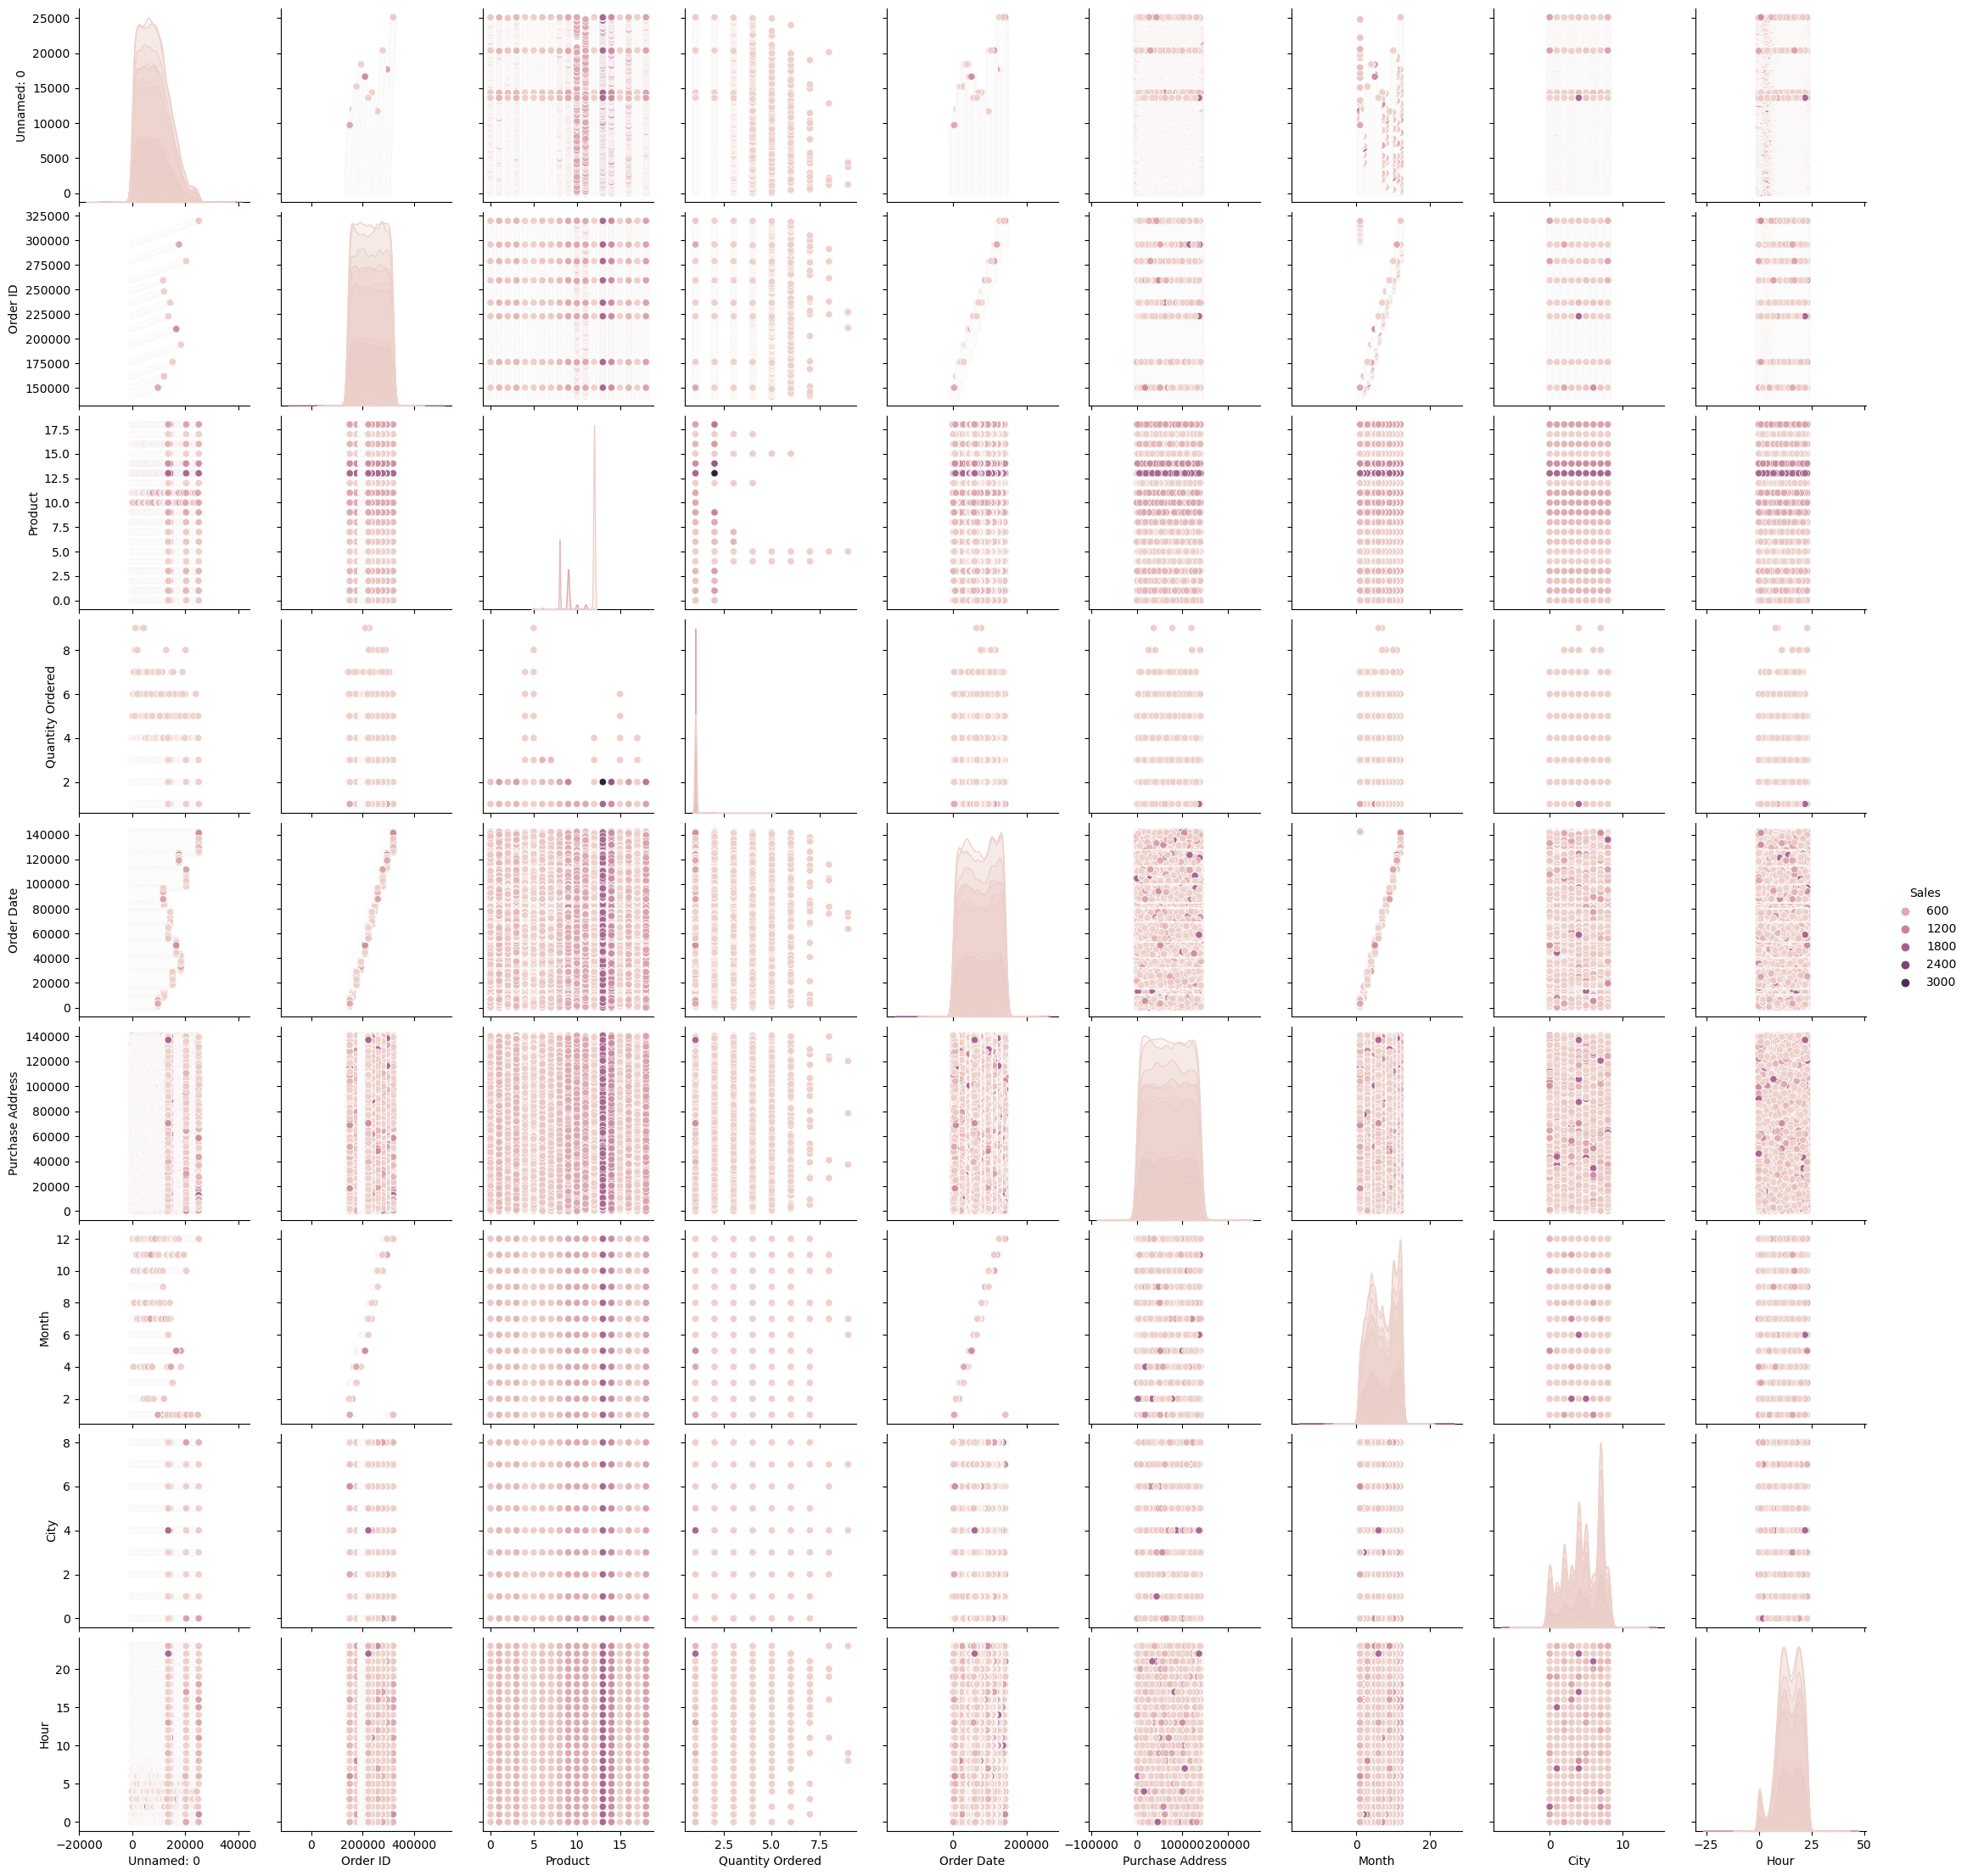

In [ ]:
sns.pairplot(data, kind='scatter',hue='Sales', diag_kind='kde')
plt.show()

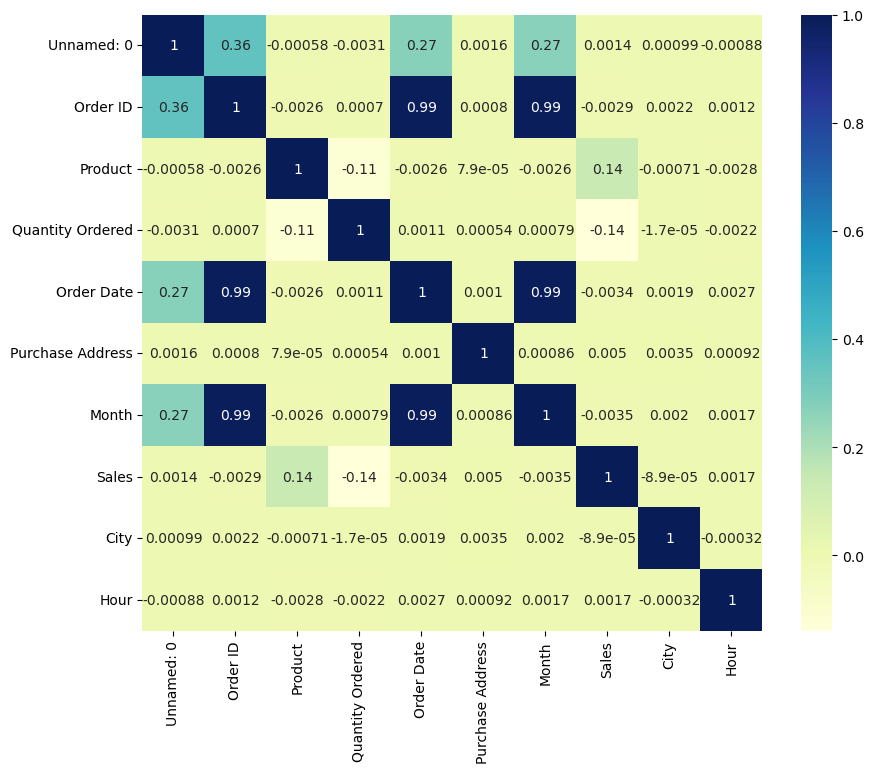

In [ ]:
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

### **feature importance graph:** A feature importance graph displays the relative significance of different features in predicting the target variable. It aids in identifying the most influential features for the model's predictions, facilitating effective feature selection and enhancing understanding of the underlying data patterns.

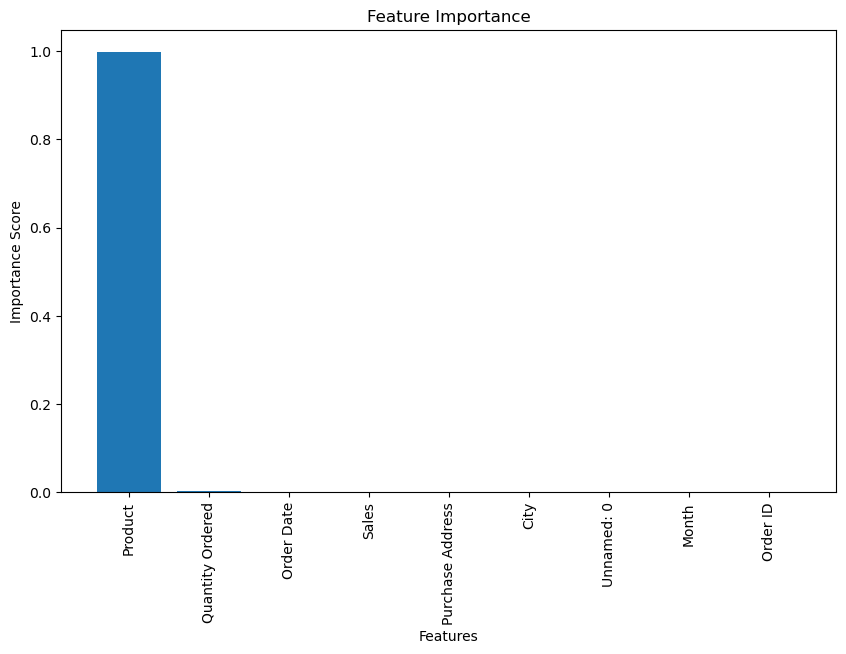

In [18]:
# Load the features   
feature_names = data.columns

# Train a RandomForestRegressor 
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances from the model
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()
